# Analysis 5 : 
## Average Land Temperatures in all Countries plotted on a globe.

In [6]:
#do all the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [7]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [3]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [42]:
#remove the duplicated countries and countries for which there is no information about the temperature
global_temp_country_clear = global_temp_country[global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])
#remove the average temperature for each country
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')
plt.savefig("./ana_5/globeplot.png", bbox_inches='tight')

In [50]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
#list of continents
continents = ['North America','South America','Europe','Asia','Africa','Australia','Antarcita']
#create new continent temp dataset and drop these cont
global_temp_continent = global_temp_country[global_temp_country['Country'].isin(continents)]
global_temp_continent = global_temp_continent.dropna()
#remove continents from country temp
global_temp_country = global_temp_country[~global_temp_country['Country'].isin(continents)]
#remove duplicates
global_temp_country = global_temp_country[~global_temp_country['Country'].str.contains('(Europe)')]
global_temp_country = global_temp_country.dropna()

Average Temperature on earth today is 17.50908180269621


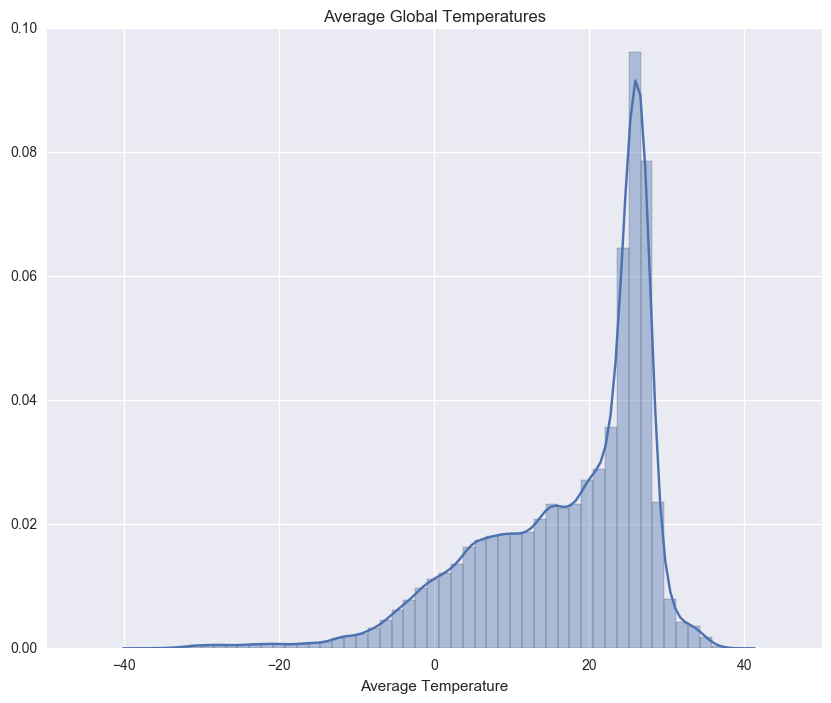

In [57]:
print('Average Temperature on earth today is',global_temp_country['AverageTemperature'].mean())
plt.figure(figsize=(10,8))
sns.distplot(global_temp_country['AverageTemperature'])
sns.plt.title('Average Global Temperatures')
sns.plt.xlabel('Average Temperature')
plt.savefig("./ana_5/avgglobalhistogram.png", bbox_inches='tight')